In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 버섯...

In [249]:
Mush = pd.read_csv('Mushroom2.csv')
Mush

,Unnamed: 0,poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,poison,convex,smooth,brown,bruises,pungent,free,close,narrow,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
1,1,enable,convex,smooth,yellow,bruises,almond,free,close,broad,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,2,enable,bell,smooth,white,bruises,anise,free,close,broad,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,3,poison,convex,scaly,white,bruises,pungent,free,close,narrow,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
4,4,enable,convex,smooth,gray,no,none,free,crowded,broad,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,enable,knobbed,smooth,brown,no,none,attached,close,broad,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,8120,enable,convex,smooth,brown,no,none,attached,close,broad,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,8121,enable,flat,smooth,brown,no,none,attached,close,broad,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,8122,poison,knobbed,scaly,brown,no,fishy,free,close,narrow,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [250]:
Mushroom = Mush[['poison','odor','bruises','spore_print_color', 'population', 'habitat']]
Mushroom

,poison,odor,bruises,spore_print_color,population,habitat
0,poison,pungent,bruises,black,nscattered,urban
1,enable,almond,bruises,brown,numerous,grasses
2,enable,anise,bruises,brown,numerous,meadows
3,poison,pungent,bruises,black,nscattered,urban
4,enable,none,no,brown,abundant,grasses
...,...,...,...,...,...,...
8119,enable,none,no,buff,clustered,leaves
8120,enable,none,no,buff,several,leaves
8121,enable,none,no,buff,clustered,leaves
8122,poison,fishy,no,white,several,leaves


In [251]:
Mushroom[Mushroom['poison']=='poison']['population'].describe()

count        3916
unique          4
top       several
freq         2848
Name: population, dtype: object

In [252]:
Mush_1 = Mushroom.copy()

In [253]:
list(Mush_1.columns)

['poison', 'odor', 'bruises', 'spore_print_color', 'population', 'habitat']

In [254]:
Mush_1['odor'].value_counts()

odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

In [255]:
Mushroom[Mushroom['poison'] == 'poison']['odor'].value_counts()

odor
foul        2160
fishy        576
spicy        576
pungent      256
creosote     192
none         120
musty         36
Name: count, dtype: int64

#### 식용/독 버섯 별 냄새 분포

In [256]:
list(Mushroom['odor'].unique())

['pungent',
 'almond',
 'anise',
 'none',
 'foul',
 'creosote',
 'fishy',
 'spicy',
 'musty']

In [257]:
# import 

In [258]:
colors = ['#ffc000','#ff9999', '#8fd9b6', '#d395d0','bisque','lightsteelblue', '#F7B7A3', 'paleturquoise', 'cornsilk']
# colors = plt.cmap('set2')

#### bruises 손상 시 변색

In [259]:
#### 식용/독 버섯 별 냄새 분포
# Mushroom[Mushroom['bruises'] == 'bruises']

# 식용 버섯 중 멍 여부
# Mushroom[Mushroom['poison']=='enable']['bruises'].value_counts()
# plt.pie(Mushroom[Mushroom['poison']=='enable']['bruises'].value_counts(), colors = colors[:len(Mushroom['odor'].value_counts())])
# plt.legend(Mushroom[Mushroom['poison']=='enable']['bruises'].value_counts().index)
# plt.show()

In [260]:
Mush_1['odor'].value_counts()

odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

#### 아가미

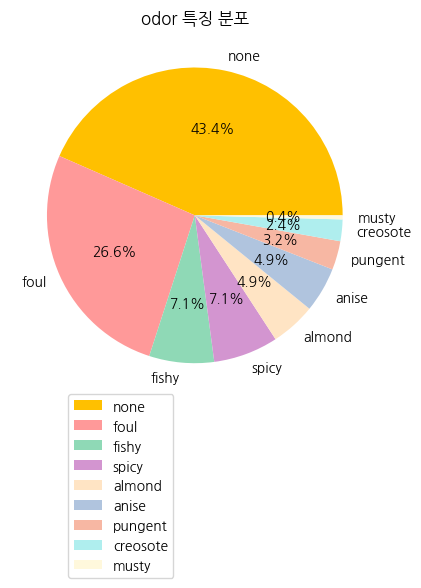

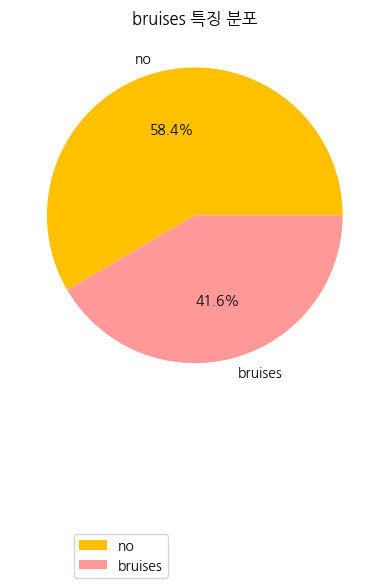

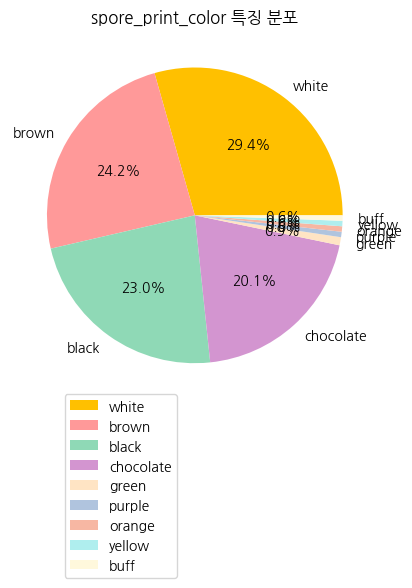

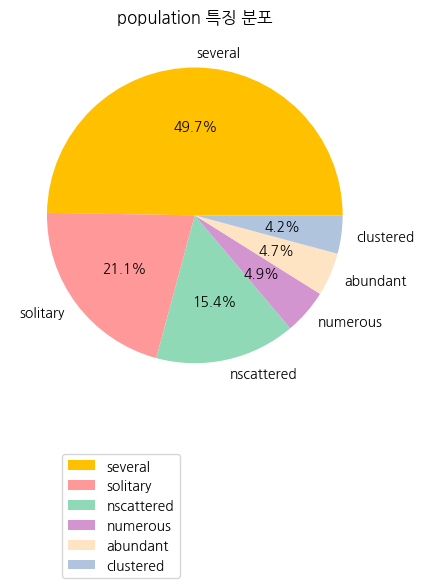

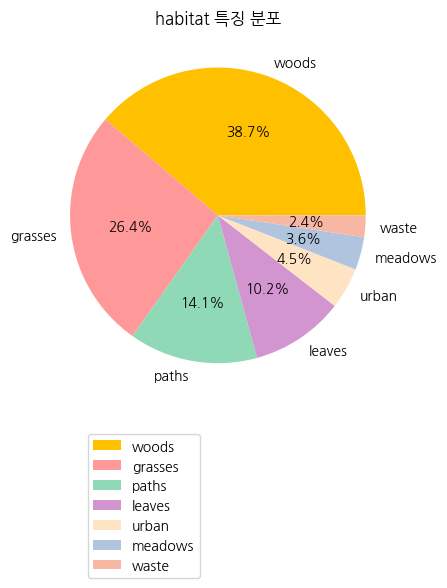

In [261]:
def draw_pie(col):
    plt.title(f'{col} 특징 분포')
    plt.pie(Mush_1[col].value_counts(), labels=list(Mush_1[col].value_counts().index),  autopct='%.1f%%', 
            colors = colors[:len(Mushroom[col].value_counts())])
    # plt.legend(Mush_1[col].value_counts().index, loc='upper right', bbox_to_anchor=(1.4,1.0))
    plt.legend(Mush_1[col].value_counts().index, loc='lower center', bbox_to_anchor=(0.3,-0.5))
    plt.savefig(f'{col} 분포 파이차트')
    plt.show()

for i in Mush_1.columns[1:]:
    draw_pie(i)

## population

In [262]:
Mushroom[Mushroom['poison']=='poison']['population'].describe()

count        3916
unique          4
top       several
freq         2848
Name: population, dtype: object

In [263]:
list(Mushroom['population'].unique())

['nscattered', 'numerous', 'abundant', 'several', 'solitary', 'clustered']

In [264]:
for l in list(Mushroom['population'].unique()):
    print(l , end=" :")
    a = Mushroom[Mushroom['population']==l]['poison'].value_counts()
    print(a)
    print()

nscattered :poison
enable    880
poison    368
Name: count, dtype: int64

numerous :poison
enable    400
Name: count, dtype: int64

abundant :poison
enable    384
Name: count, dtype: int64

several :poison
poison    2848
enable    1192
Name: count, dtype: int64

solitary :poison
enable    1064
poison     648
Name: count, dtype: int64

clustered :poison
enable    288
poison     52
Name: count, dtype: int64



In [265]:
for l in list(Mushroom['habitat'].unique()):
    print(l , end=" :")
    a = Mushroom[Mushroom['habitat']==l]['poison'].value_counts()
    print(a)
    print()

urban :poison
poison    272
enable     96
Name: count, dtype: int64

grasses :poison
enable    1408
poison     740
Name: count, dtype: int64

meadows :poison
enable    256
poison     36
Name: count, dtype: int64

woods :poison
enable    1880
poison    1268
Name: count, dtype: int64

paths :poison
poison    1008
enable     136
Name: count, dtype: int64

waste :poison
enable    192
Name: count, dtype: int64

leaves :poison
poison    592
enable    240
Name: count, dtype: int64



In [266]:
a.index

Index(['poison', 'enable'], dtype='object', name='poison')

urban :grasses :meadows :woods :paths :waste :leaves :

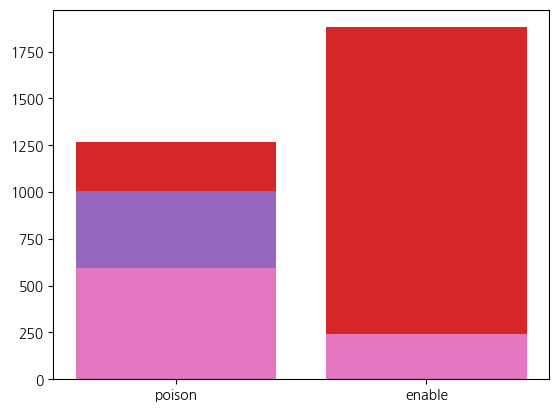

In [267]:
for l in list(Mushroom['habitat'].unique()):
    print(l , end=" :")
    a = Mushroom[Mushroom['habitat']==l]['poison'].value_counts()
    plt.bar(list(a.index),a)

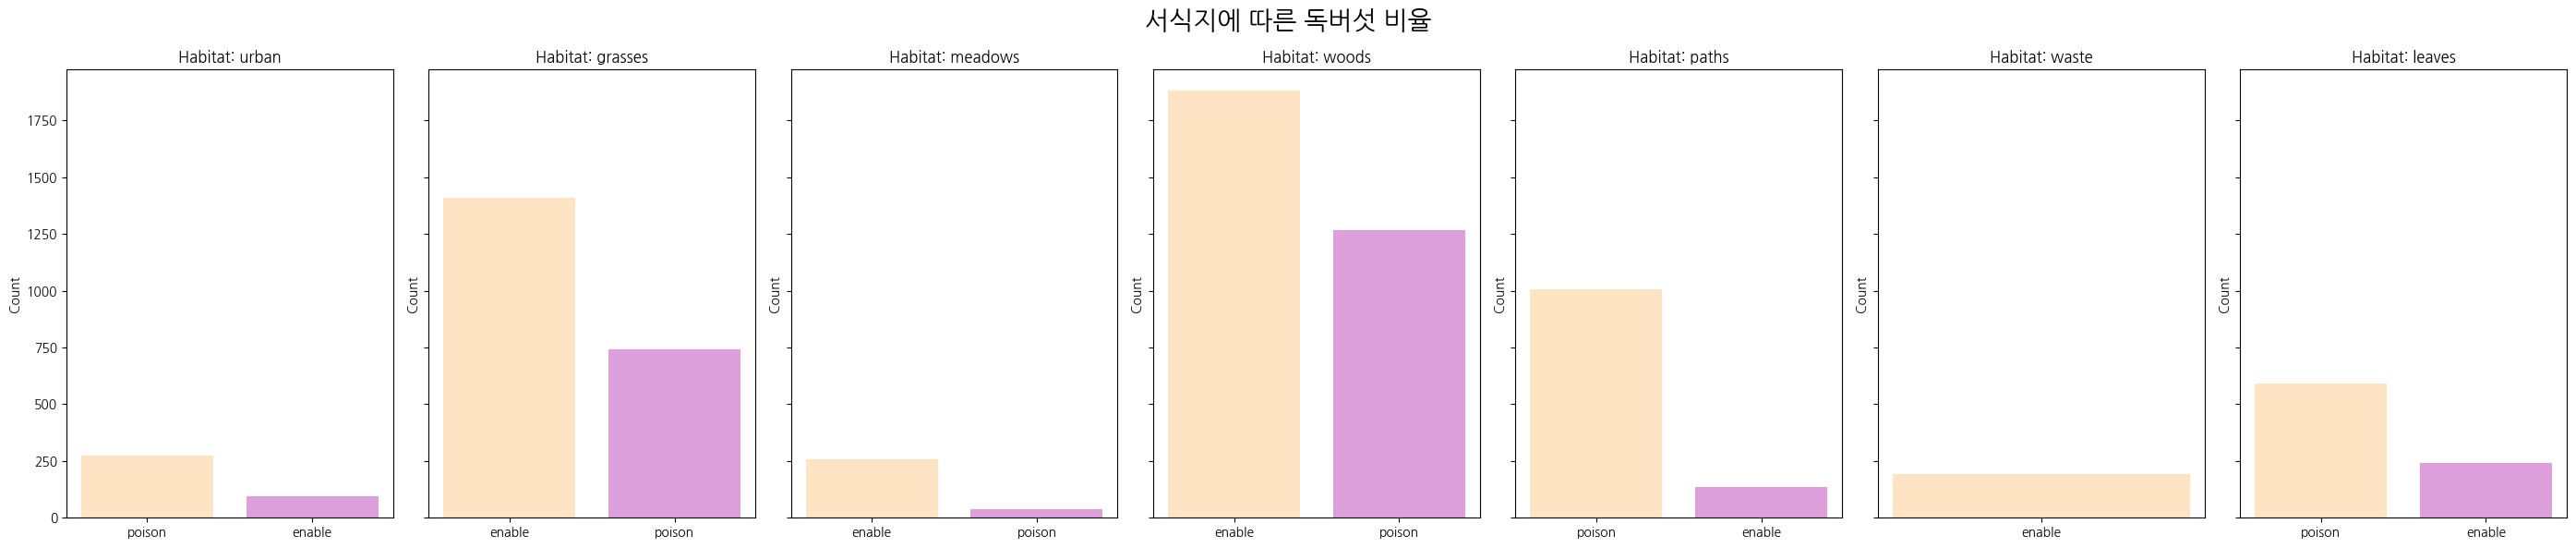

In [268]:
habitats = Mushroom['habitat'].unique()
n = len(habitats)  # subplot의 수

fig, axes = plt.subplots(1, n, figsize=(4*n, 6), sharey=True)
fig.suptitle('서식지에 따른 독버섯 비율', fontsize = 20 )
for i, l in enumerate(habitats):
    a = Mushroom[Mushroom['habitat'] == l]['poison'].value_counts()
    axes[i].bar(list(a.index), a, color=['bisque','plum'])
    axes[i].set_title(f'Habitat: {l}')
    # axes[i].set_xlabel(Mushroom.columns[1:])
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [283]:
habitats = Mushroom['habitat'].unique()
# for i, l in enumerate(habitats):
#     print(i, l)
#     print(l.index)
habitats

array(['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'],
      dtype=object)

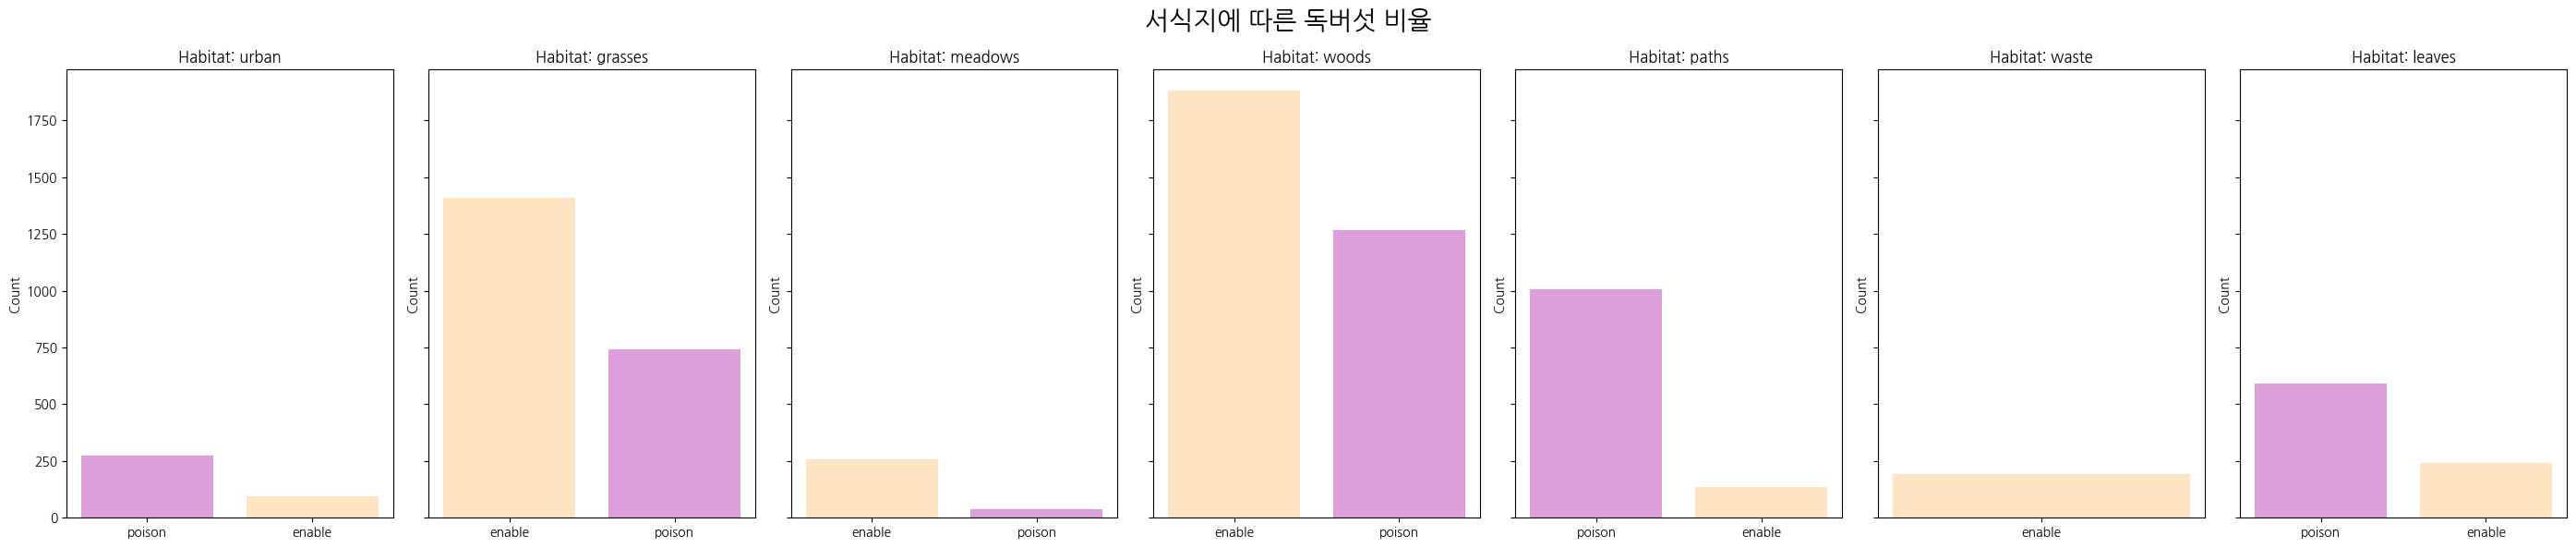

In [285]:
habitats = Mushroom['habitat'].unique()
n = len(habitats)  # subplot의 수

fig, axes = plt.subplots(1, n, figsize=(4*n, 6), sharey=True)
fig.suptitle('서식지에 따른 독버섯 비율', fontsize = 20 )

for i, l in enumerate(habitats):
    colors = []
    a = Mushroom[Mushroom['habitat'] == l]['poison'].value_counts()
    for index in a.index:
        if index == 'enable':
            colors.append('bisque')  # 비스크 색깔
        elif index == 'poison':
            colors.append('plum')  # 연한 형광보라색 (plum)
    


    
    axes[i].bar(list(a.index), a, color=colors)
    
    axes[i].set_title(f'Habitat: {l}')
    # axes[i].set_xlabel(Mushroom.columns[1:])
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()





## 냄새

In [270]:
p = Mushroom[Mushroom['poison']=='poison']['odor'].value_counts()

In [271]:
e = Mushroom[Mushroom['poison']=='enable']['odor'].value_counts()

In [272]:
p.index

Index(['foul', 'fishy', 'spicy', 'pungent', 'creosote', 'none', 'musty'], dtype='object', name='odor')

In [273]:
colors1 = ['#ff9999', '#8fd9b6', '#d395d0','lightsteelblue', '#F7B7A3', 'cornsilk']

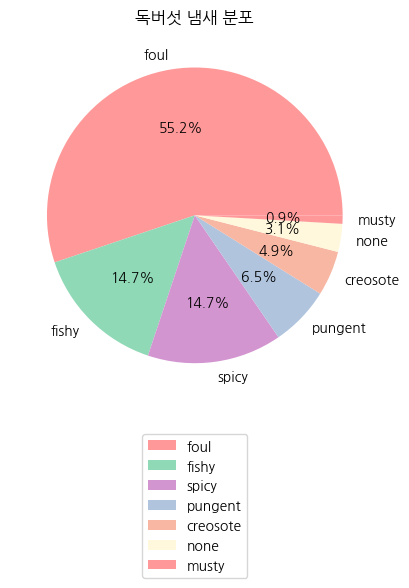

In [274]:
plt.pie(p, autopct='%.1f%%', colors = colors1[:len(p)],labels=list(p.index))
plt.legend(p.index,loc='lower center', bbox_to_anchor=(0.5,-0.5))
plt.title('독버섯 냄새 분포')
plt.show()


    # plt.pie(Mush_1[col].value_counts(), labels=list(Mush_1[col].unique()),  autopct='%.1f%%', 
    #         colors = colors[:len(Mushroom[col].value_counts())])

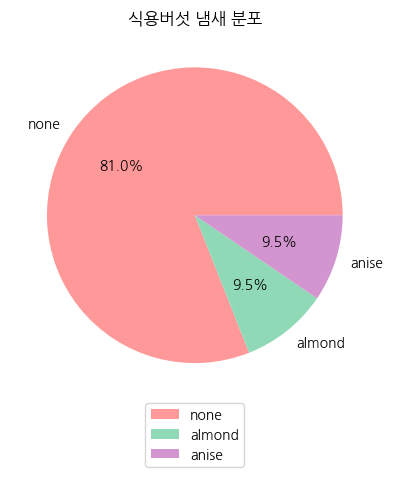

In [275]:
plt.pie(e, autopct='%.1f%%', colors = colors1[:len(e)],labels=list(e.index))
plt.legend(e.index,loc='lower center', bbox_to_anchor=(0.5,-0.2))
plt.title('식용버섯 냄새 분포')
plt.show()

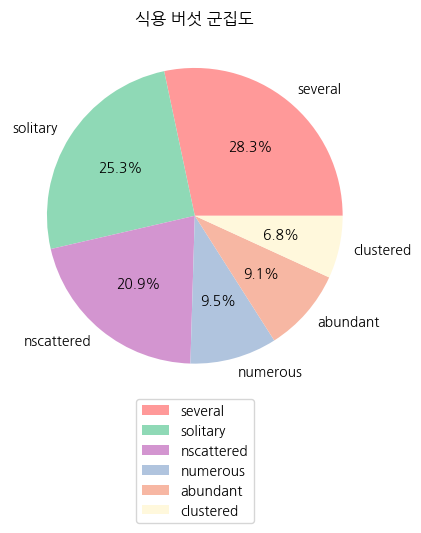

In [307]:
e = Mushroom[Mushroom['poison']=='enable']['population'].value_counts()
plt.pie(e, autopct='%.1f%%', colors = colors1[:len(e)],labels=list(e.index))
plt.legend(e.index,loc='lower center', bbox_to_anchor=(0.5,-0.35))
plt.title('식용 버섯 군집도')
plt.show()

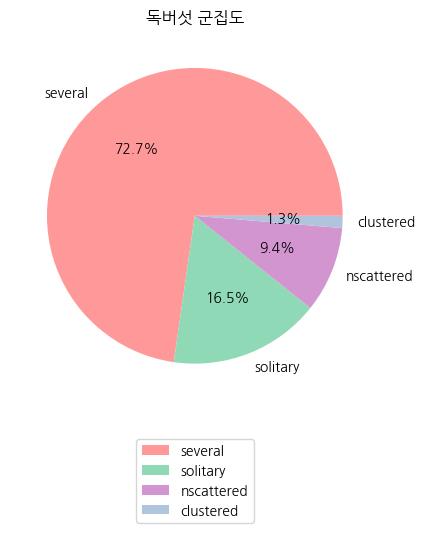

In [306]:
e = Mushroom[Mushroom['poison']=='poison']['population'].value_counts()
plt.pie(e, autopct='%.1f%%', colors = colors1[:len(e)],labels=list(e.index))
plt.legend(e.index,loc='lower center', bbox_to_anchor=(0.5,-0.35))
plt.title('독버섯 군집도')
plt.show()

## 포자색

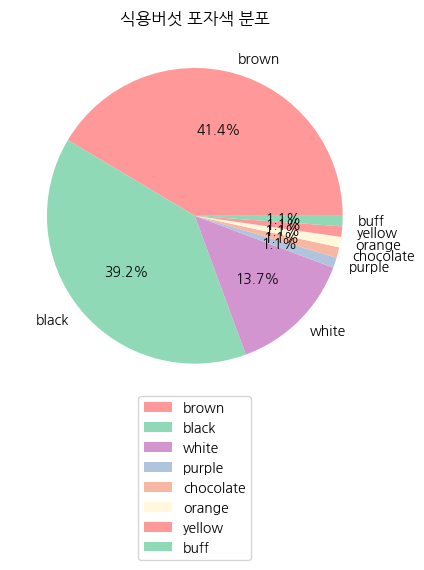

In [298]:
# p = Mushroom[Mushroom['poison']=='poison']['spore_print_color'].value_counts()
e = Mushroom[Mushroom['poison']=='enable']['spore_print_color'].value_counts()

# plt.pie(p, autopct='%.1f%%', colors = colors[len(p):],labels=list(p.index))
# plt.legend(p.index,loc='lower center', bbox_to_anchor=(0.5,-0.3))
# plt.title('독버섯 포자색 분포')
# plt.show()

# plt.pie(e, autopct='%.1f%%', colors = colors1[len(e)::-1], labels=list(e.index))
plt.pie(e, autopct='%.1f%%', colors = colors1[:len(e)], labels=list(e.index))
plt.legend(e.index,loc='lower center', bbox_to_anchor=(0.5,-0.45))
plt.title('식용버섯 포자색 분포')
plt.show()